# Data Transformation and Mapping 
- **apply**: allows us to apply a function to each element, row, or column in a DataFrame or Series
- **map**: is used to map values in a Series according to a dictionary or another series
- **replace**: replace allows for replacing specific values in the DataFrame with new value 
- **astyoe**: this is used to cinvert data type
- **pipe**: it allows chaining and using complex functions that operate on the entire DataFrame. This can be used for complex transformation operation

apply

In [2]:
# convert marks to scale of 1
import pandas as pd
students = pd.read_csv('data/student.csv')
students['mark_percent'] = students['mark'].apply(lambda m: m/100)
students.head()

,id,name,class,mark,gender,mark_percent
0,1,John Deo,Four,75,female,0.75
1,2,Max Ruin,Three,85,male,0.85
2,3,Arnold,Three,55,male,0.55
3,4,Krish Star,Four,60,female,0.60
4,5,John Mike,Four,60,female,0.60


map

In [3]:
# replace
students['grade']= students['class'].map({'One':1,'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Severn':7, 'Eight':8, 'Nine':9, 'Ten': 10})
students['gender_code'] = students['gender'].map({'male':1 , 'female':2})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,John Deo,Four,75,female,0.75,4.0,2
1,2,Max Ruin,Three,85,male,0.85,3.0,1
2,3,Arnold,Three,55,male,0.55,3.0,1
3,4,Krish Star,Four,60,female,0.60,4.0,2
4,5,John Mike,Four,60,female,0.60,4.0,2


replace

In [4]:
#replace soecific values in the 'class' column 
students['class'] = students['class'].replace({'Four': '4th', 'Ten': '10th', 'Eight':'8th'})
#replace name 'John Doe' with 'JaiRam' (replace specific value)
students['name'] = students['name'].replace({'John Deo':'Jai Ram'})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Jai Ram,4th,75,female,0.75,4.0,2
1,2,Max Ruin,Three,85,male,0.85,3.0,1
2,3,Arnold,Three,55,male,0.55,3.0,1
3,4,Krish Star,4th,60,female,0.60,4.0,2
4,5,John Mike,4th,60,female,0.60,4.0,2


astype

In [5]:
#convert 'mark'column to float
students['mark'] = students['mark'].astype(float)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Jai Ram,4th,75.0,female,0.75,4.0,2
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1
2,3,Arnold,Three,55.0,male,0.55,3.0,1
3,4,Krish Star,4th,60.0,female,0.60,4.0,2
4,5,John Mike,4th,60.0,female,0.60,4.0,2


pipe


In [12]:
#create a function that triples marks and pipes it to the pandas DataFrame
def triple_marks(df):
    df['mark']= df['mark'] * 3
    return df

def check_result(df):
    df['result'] = df['mark'].apply(lambda m : 'Pass' if m>40 else 'Fail')
    return df

students = students.pipe(check_result)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code,result
0,1,Jai Ram,4th,225.0,female,0.75,4.0,2,Pass
1,2,Max Ruin,Three,255.0,male,0.85,3.0,1,Pass
2,3,Arnold,Three,165.0,male,0.55,3.0,1,Pass
3,4,Krish Star,4th,180.0,female,0.60,4.0,2,Pass
4,5,John Mike,4th,180.0,female,0.60,4.0,2,Pass


## Data Cleaning and Manipulation

- Handle Missing Data
- Handle Duplicates
- One-Hot_Encoding 
- Normalization


## Handle Missing Data


• Remove Rows Containing Missing Values (df. dropna ())

    - dropna (axis=0) removes rows containing at least one missing value

    - (dropna (axis=1)) Removes columns containing at least one missing value

• Replace Missing Values (df.fillna())

    - Replace with specific value: (df.fillna(value)) fill the missing values with the previous row value of column value (if axis =1)
    
    - ``Backward Fill``, Forward Fill: (df. f111na (value, method="bf111*))

(df. fillna(value, method='ff111°)) replaces the missing values with the next value
• Fill individual column with specified value: (df. fillna(('height' :150, weight: 60})
replaces the missina values of column.heicht with 150 and column weight with 60

In [18]:
from IPython.display import display

students = pd.read_csv('data/student.csv')
display(students.head())
#students.dropna(axis=0, how = 'any', inplace=True)

#students = students.fillna(1) #replace missing valyes with 1

students.fillna(method = 'ffill') #fill with previous row value
students.fillna(method = 'bfill') #fill with next row
students['mark'].fillna(50) #only fill empty value of Name column
students.fillna({'mark':50, 'gender': 'Male'}) #replace mark with 50 if its empty and gender
df_interpolated = students.interpolate()
students.fillna(df_interpolated)
students['mark'].fillna(students['mark'].mean())

display(students.head())

,id,name,class,mark,gender
0,1,John Deo,Four,75,NaN
1,2,Max Ruin,Three,85,male
2,3,Arnold,NaN,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


C:\Users\subhe\AppData\Local\Temp\ipykernel_19540\773364397.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method = 'ffill') #fill with previous row value
C:\Users\subhe\AppData\Local\Temp\ipykernel_19540\773364397.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method = 'bfill') #fill with next row
C:\Users\subhe\AppData\Local\Temp\ipykernel_19540\773364397.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = students.interpolate()


,id,name,class,mark,gender
0,1,John Deo,Four,75,NaN
1,2,Max Ruin,Three,85,male
2,3,Arnold,NaN,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


## Handle Duplicate Data
- check duplicates
- drop duplicates

In [19]:
duplicates = students.duplicated() #check duplicate
students.drop_duplicates()
duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

## One-Hot-Encoding

• One Hot Encoding is a method for converting categorical variables into a binary format. It creates new binary columns (Os and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence For example we replace the country name with numerical
value e.g. America = 1, India=2 Nepal=3

In [20]:
students = pd.read_csv('data/student.csv')
df_pandas_encoded = pd.get_dummies(students, columns=['class'])
print(f"One-Hot Encoded Data using Pandas: \n")
display(df_pandas_encoded)

One-Hot Encoded Data using Pandas: 



,id,name,mark,gender,class_Eight,class_Fifth,class_Five,class_Four,class_Nine,class_Seven,class_Six,class_Three
0,1,John Deo,75,NaN,False,False,False,True,False,False,False,False
1,2,Max Ruin,85,male,False,False,False,False,False,False,False,True
2,3,Arnold,55,male,False,False,False,False,False,False,False,False
3,4,Krish Star,60,female,False,False,False,True,False,False,False,False
4,5,John Mike,60,female,False,False,False,True,False,False,False,False
5,6,Alex John,55,male,False,False,False,True,False,False,False,False
6,7,My John Rob,78,male,False,True,False,False,False,False,False,False
7,8,Asruid,85,male,False,False,True,False,False,False,False,False
8,9,Tes Qry,78,male,False,False,False,False,False,False,True,False
9,10,Big John,55,female,False,False,False,True,False,False,False,False


## Data Normalization
Data normalization involves adjusting measurement values of different scales to a common scale. 

Normalization is only applicable to numerical columns.

In [4]:
import numpy as np
import pandas as pd
products =pd.read_csv('data/product-data.csv')
#Single Feature Scaling
products['Sales_Single_Scale']=products['Sales']/ products['Sales'].max()

#log
products['Sales_Log_Scale']=np.log1p(products['Sales'])

#Clipping
products['Discount_Clipped']=products['Discount_Percentage'].clip(lower=5,upper=15)

products

,Product_ID,Sales,Price,Customer_Rating,Discount_Percentage,Sales_Single_Scale,Sales_Log_Scale,Discount_Clipped
0,1,500,200,4.2,10,0.50,6.216606,10
1,2,700,450,3.9,15,0.70,6.552508,15
2,3,800,300,4.5,12,0.80,6.685861,12
3,4,900,350,4.8,8,0.90,6.803505,8
4,5,1000,500,4.0,5,1.00,6.908755,5
5,6,300,250,3.7,20,0.30,5.707110,15
6,7,450,275,4.3,17,0.45,6.111467,15
7,8,620,320,3.8,7,0.62,6.431331,7
8,9,750,400,4.1,6,0.75,6.621406,6
9,10,850,375,4.6,14,0.85,6.746412,14


## Grouping & Aggregate
- Grouping consists of three operations
    - Split
    - Apply
    - Combine

In [17]:
import numpy as np 
from IPython.display import display

students = pd.read_csv('data/student.csv')

#group data based on gender
gender_data = students.groupby('gender')
display(gender_data.count())
gender_data['mark'].mean()
#standard deviation 

group_by_class = students.groupby('class')

display(group_by_class['mark'].mean())
display(group_by_class['id'].count())

,id,name,class,mark
gender,,,,
female,16,16,16,16
male,18,18,17,18


class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     70.888889
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    83.000000
Name: mark, dtype: float64

class
Eight     1
Fifth     1
Five      2
Four      9
Nine      2
Seven    10
Six       7
Three     2
Name: id, dtype: int64


 ## Aggregation
- count()-Numbers of non-null observations
- sum()-Sum of values
- mean()- Mean of values
- median()- Arithmetic median of values
- min()-Minimum
- max()-Maximum
- mode()-Mode
- std()-Standard Deviation
- var()-Variance

# Sorting
## Sort by Index 
## Sort by Value

- ascending
- descending
- sorting by date
- sorting by key functions


In [19]:
country_data_list = [
            ['Afghanistan', 1952, 8425333, 'Asia'],
            ['Australia', 1957, 9712569, 'Oceania'],
            ['Brazil', 1962, 76039390, 'South America'],
]
country_data = pd.DataFrame(country_data_list, columns=['Country', 'Year', 'Population', 'Continent'])
new_sorted_data = country_data.sort_values(by=['Country'], ascending = True)
display(new_sorted_data)

sort_by_descending = country_data.sort_values(by=['Country'], ascending=False)
display(sort_by_descending)
sort_by_population = country_data.sort_values(by=['Population', 'Country'], ascending=False)
display(sort_by_population)

,Country,Year,Population,Continent
0,Afghanistan,1952,8425333,Asia
1,Australia,1957,9712569,Oceania
2,Brazil,1962,76039390,South America


,Country,Year,Population,Continent
2,Brazil,1962,76039390,South America
1,Australia,1957,9712569,Oceania
0,Afghanistan,1952,8425333,Asia


,Country,Year,Population,Continent
2,Brazil,1962,76039390,South America
1,Australia,1957,9712569,Oceania
0,Afghanistan,1952,8425333,Asia


### Sorting by Date

In [25]:
data= pd.read_csv('data/student-admission.csv')

#convert to datetime
data['AdmissionDate'] = pd.to_datetime(data['AdmissionDate'])

#sort by Admission date
sorted_by_date = data.sort_values(by=['AdmissionDate', 'Name'],ascending=False)
sorted_by_date

,Unnamed: 0,AdmissionDate,StudentID,Name,Stream
0,0,2021-01-25,7,Ram,CSE
1,1,2021-01-22,5,Shyam,ECE
4,4,2021-01-22,6,Lucky,CSE
6,6,2021-01-21,4,Danny,EEE
2,2,2021-01-20,3,Mohan,Civil
3,3,2021-01-18,2,Sohan,Mechanical
5,5,2021-01-17,1,Abhinav,IT


Category 
Relationship
- Scatter Plot
- Bubble Chart
Heat Map
Density Plot
Correlation Matrix

Distributions 
- Histogram
- Box Plot (Box-and-Whisket Plot)
Violin Plot 
Frequency Polygon
Stem-and-

## Data Comparison Visualization
- Bar Charts
- Line Graphs
- Multiple Line Graphs

In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

## Compare GDP Growth 
- bar chart
- line graph

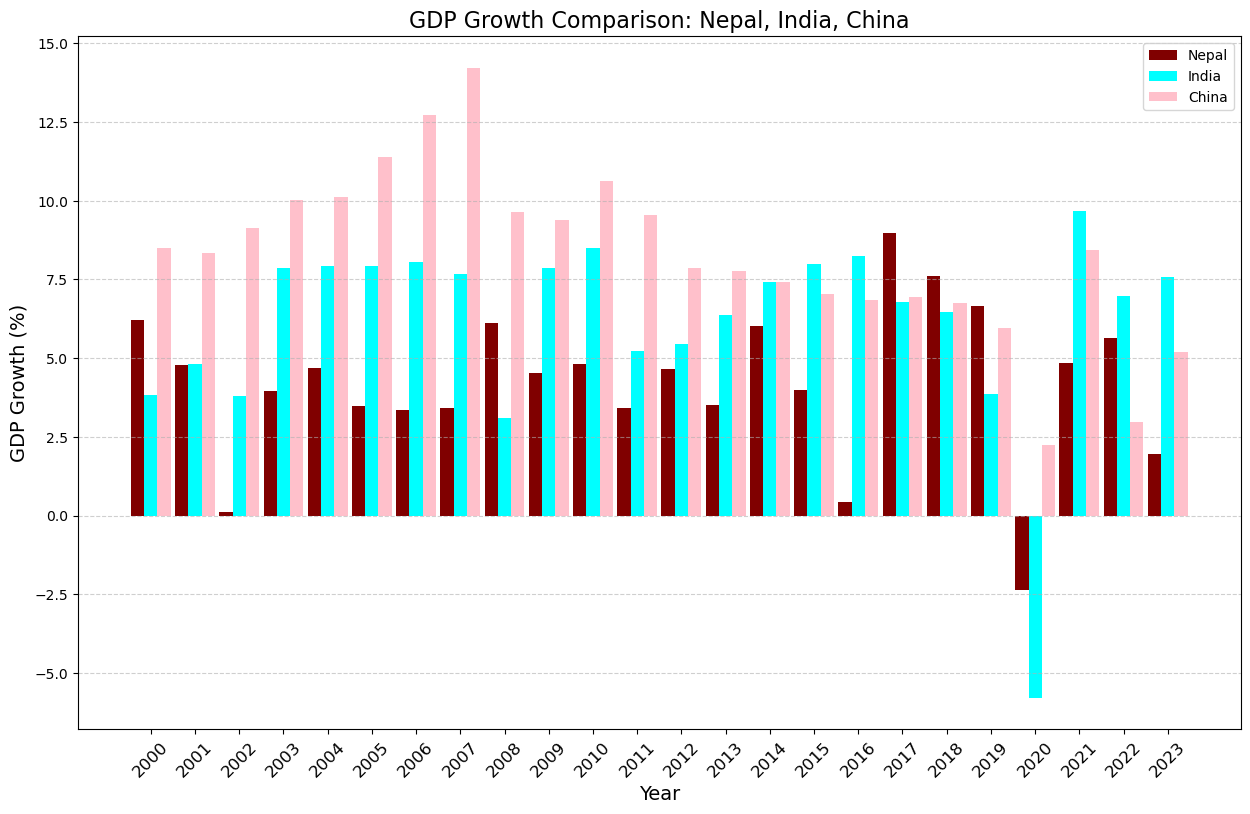

In [37]:
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')

# Set up the figure size
plt.figure(figsize=(15, 9))

# Define the width of the bars
width = 0.3
x = range(len(nep_ind_china_gdp_data['Year']))

# Plotting the bars for Nepal, India, and China
plt.bar([i - width for i in x], nep_ind_china_gdp_data['Nepal'], width=width, label='Nepal', color='maroon')
plt.bar(x, nep_ind_china_gdp_data['India'], width=width, label='India', color='cyan')
plt.bar([i + width for i in x], nep_ind_china_gdp_data['China'], width=width, label='China', color='pink')

# Adding titles and labels
plt.title('GDP Growth Comparison: Nepal, India, China', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth (%)', fontsize=14)
plt.xticks(x, nep_ind_china_gdp_data['Year'], fontsize=12, rotation=45)
plt.legend()

# Adding grid lines for better
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()